In [1]:
from ipymol import viewer as pymol

In [2]:
##
##RUN 'pymol -R' from main console before starting server
##
pymol.start()   # Start PyMOL RPC server

pymol.do("pwd")

In [3]:
pymol.do('load 4v6u.cif')
pymol.do('load 4v9f.cif')

In [4]:
## style/view preferences
pymol.do('show cartoon, all')

In [5]:
import numpy as np
import pandas as pd

In [6]:
chains = pd.read_table('chainIDs.txt')
chains[0:]

,Molecule,Chains,Length,Organism,PDB,geneID,ID,Alias
0,E-tRNA,A1,77,Pyrococcus furiosus,4v6u,E-tRNA,NaN,NaN
1,P-tRNA,A0,76,Pyrococcus furiosus,4v6u,P-tRNA,NaN,NaN
2,16S rRNA,A2,1495,Pyrococcus furiosus,4v6u,rrs,VNGr02,rrs
3,23S rRNA,0,2910,Haloarcula marismortui,4v9f,rrlA,VNGr03,rrlA
4,5S rRNA,9,122,Haloarcula marismortui,4v9f,rrlB,VNGr04,rrlB
5,30S ribosomal protein S10P,AL,102,Pyrococcus furiosus,4v6u,rps10,VNG2648G,rps10p
6,30S ribosomal protein S11P,AM,137,Pyrococcus furiosus,4v6u,rps11,VNG1134G,rps11p
7,30S ribosomal protein S12P,AN,147,Pyrococcus furiosus,4v6u,rps12,VNG2658G,rps12P
8,30S ribosomal protein S13P,AO,148,Pyrococcus furiosus,4v6u,rps13,VNG1132G,rps13p
9,30S ribosomal protein S14P type Z,AP,56,Pyrococcus furiosus,4v6u,rps14,VNG1706G,rps14P


In [16]:
## label proteins/chains
for i in np.arange(len(chains)):
        pymol.do('sele ' + chains.geneID[i] + ', ' + chains.PDB[i] + ' and chain ' + chains.Chains[i])


In [8]:
## align halo LSU to pyro LSU
pymol.do('sele pyrorRNA, 4v6u and chain B*')
pymol.do('align 4v9f, pyrorRNA')

In [9]:
## hide pyro LSU except two subunits (L1, L40e) and SSU L7ae, unknown SX chain A9 and halo.arcLX (chain 6)
pymol.do('hide everything, pyrorRNA or chain A3 or chain A9 or chain 6')
pymol.do('show spheres, rpl1')
pymol.do('show spheres, rpl40e')

In [17]:
## color RNA grey
pymol.do('color grey, chain A2 or chain 0 or chain 9') ##rRNA
pymol.do('color grey, chain A0 or chain A1') ##tRNA


In [11]:
chains.loc[chains['ID'].isin(['VNG0433C', 'VNG1668G', 'VNG2514G', 'VNG2010G', 'VNG2047G', 'VNG2048G', 'VNG2658G',])]

,Molecule,Chains,Length,Organism,PDB,geneID,ID,Alias
7,30S ribosomal protein S12P,AN,147,Pyrococcus furiosus,4v6u,rps12,VNG2658G,rps12P
13,30S ribosomal protein S19E,AU,150,Pyrococcus furiosus,4v6u,rps19e,VNG2010G,rps19e
15,30S ribosomal protein S24e,AV,99,Pyrococcus furiosus,4v6u,rps24e,VNG2048G,rps24e
16,30S ribosomal protein S27ae,AY,50,Pyrococcus furiosus,4v6u,rps27ae,VNG2047G,rps27ae
25,30S ribosomal protein S6e,AG,125,Pyrococcus furiosus,4v6u,rps6e,VNG2514G,rps6e
27,30S ribosomal protein S8e,AJ,127,Pyrococcus furiosus,4v6u,rps8e,VNG1668G,rps8e


In [54]:
##Color chains corresponding to outlier and unClustered subunits (magenta and orange): 

def color_chains(gene):
    pymol.do('color magenta, chain ' + 
        chains.Chains[gene] + 
        '; as spheres, chain ' + 
        chains.Chains[gene])

def color_chains_orange(gene):
    pymol.do('color orange, chain ' + 
        chains.Chains[gene] + 
        '; as spheres, chain ' + 
        chains.Chains[gene])
    
color_chains_orange(7)
color_chains_orange(13)
color_chains_orange(15)
color_chains_orange(16)
color_chains(25)
color_chains(27)
## color_chains(5) ## s10 color differently to account for (VNG0433C) two subunits

In [13]:
chains.loc[chains['ID'].isin(['VNG1143G', 'VNG1134G', 'VNG1133G', 'VNG1132G', 'VNG1138G', 'VNG1139G', 'VNG1137G',])]

,Molecule,Chains,Length,Organism,PDB,geneID,ID,Alias
6,30S ribosomal protein S11P,AM,137,Pyrococcus furiosus,4v6u,rps11,VNG1134G,rps11p
8,30S ribosomal protein S13P,AO,148,Pyrococcus furiosus,4v6u,rps13,VNG1132G,rps13p
19,30S ribosomal protein S2P,AB,202,Pyrococcus furiosus,4v6u,rps2,VNG1143G,rps2P
23,30S ribosomal protein S4P,AD,180,Pyrococcus furiosus,4v6u,rps4,VNG1133G,rps4p
29,30S ribosomal protein S9P,AK,135,Pyrococcus furiosus,4v6u,rps9,VNG1139G,rps9p
34,50S ribosomal protein L13P,J,145,Haloarcula marismortui,4v9f,rpl13,VNG1138G,rpl13p
38,50S ribosomal protein L18e,O,116,Haloarcula marismortui,4v9f,rpl18e,VNG1137G,rpl18e


In [42]:
##Color chains green corresponding to Cluster 2 subunits: S11p, s13p, s2p, s4p, s9p, l13p, l18e

def color_chains(gene):
    pymol.do('color green, chain ' + 
        chains.Chains[gene] + 
        '; as spheres, chain ' + 
        chains.Chains[gene])

color_chains(6)
color_chains(8)
color_chains(19)
color_chains(23)
color_chains(29)
color_chains(34)
color_chains(38)

In [15]:
chains.loc[chains['ID'].isin(['VNG1157G', 'VNG0239C', 'VNG0099G', 'VNG1158G', 'VNG1159G', 'VNG2648G'])]

,Molecule,Chains,Length,Organism,PDB,geneID,ID,Alias
5,30S ribosomal protein S10P,AL,102,Pyrococcus furiosus,4v6u,rps10,VNG2648G,rps10p
18,30S ribosomal protein S28e,AX,71,Pyrococcus furiosus,4v6u,rps28e,VNG1158G,rps28e
31,50S ribosomal protein L10e,H,177,Haloarcula marismortui,4v9f,rpl10e,VNG0099G,rpl10e
45,50S ribosomal protein L24e,U,67,Haloarcula marismortui,4v9f,rpl24e,VNG1159G,rpl24e
52,50S ribosomal protein L37Ae,Z,92,Haloarcula marismortui,4v9f,rpl37ae,VNG0239C,rpl37ae
61,50S ribosomal protein L7Ae,F,120,Haloarcula marismortui,4v9f,rpl7ae,VNG1157G,rpl7ae


In [55]:
##Color chains blue corresponding to Cluster 3 subunits: s10p, s28e, l10e, l24e, l37ae, l7ae

def color_chains(gene):
    pymol.do('color blue, chain ' + 
        chains.Chains[gene] + 
        '; as spheres, chain ' + 
        chains.Chains[gene])

color_chains(5) ## s10 color differently to account for two subunits?
color_chains(18)
color_chains(31)
color_chains(45)
color_chains(52)
color_chains(61)


In [17]:
chains.loc[chains['ID'].isin(['VNG0790G', 'VNG0177G', 'VNG0860G', 'VNG0787G', 'VNG1494G', 'VNG1108G', 'VNG1693G', 'VNG1689G', 
                              'VNG1433G', 'VNG0551G', 'VNG1169C', 'VNG1170G', 'VNG1105G', 'VNG1103G', 'VNG1104G', 'VNG1695G', 
                              'VNG1692G', 'VNG2657G', 'VNG1690G', 'VNG1691G', 'VNG1709G', 'VNG2467G', 'VNG1703G', 'VNG1697G', 
                              'VNG1705G', 'VNG1702G', 'VNG1700G', 'VNG0550G', 'VNG1707G', 'VNG1718G', 'VNG1713G', 'VNG1715G', 
                              'VNG1701G', 'VNG2076G', 'VNG1706G', 'VNG1714G', 'VNG1711G', 'VNG1716G', 'VNG2469G', 'VNG1698G'])]

,Molecule,Chains,Length,Organism,PDB,geneID,ID,Alias
9,30S ribosomal protein S14P type Z,AP,56,Pyrococcus furiosus,4v6u,rps14,VNG1706G,rps14P
10,30S ribosomal protein S15P/S13e,AQ,158,Pyrococcus furiosus,4v6u,rps15,VNG0790G,rps15p
11,30S ribosomal protein S17e,AS,67,Pyrococcus furiosus,4v6u,rps17e,VNG1433G,rps17E
12,30S ribosomal protein S17P,AR,113,Pyrococcus furiosus,4v6u,rps17p,VNG1700G,rps17p
14,30S ribosomal protein S19P,AT,132,Pyrococcus furiosus,4v6u,rps19,VNG1693G,rps19p
17,30S ribosomal protein S27e,AW,63,Pyrococcus furiosus,4v6u,rps27e,VNG0550G,rps27e
20,30S ribosomal protein S3Ae,AA,198,Pyrococcus furiosus,4v6u,rps3ae,VNG0787G,rps3e
21,30S ribosomal protein S3P,AC,210,Pyrococcus furiosus,4v6u,rps3,VNG1697G,rps3p
22,30S ribosomal protein S4e,AE,243,Pyrococcus furiosus,4v6u,rps4e,VNG1703G,rps4e
24,30S ribosomal protein S5P,AF,236,Pyrococcus furiosus,4v6u,rps5,VNG1715G,rps5p


In [46]:
##Color chains red corresponding to Cluster 1 subunits: 

def color_chains(gene):
    pymol.do('color red, chain ' + 
        chains.Chains[gene] + 
        '; as spheres, chain ' + 
        chains.Chains[gene])

color_chains(9)
color_chains(10)
color_chains(11)
color_chains(12)
color_chains(14)
color_chains(17)
color_chains(20)
color_chains(21)
color_chains(22)
color_chains(24)
color_chains(26)
color_chains(28)
color_chains(30)
color_chains(32)
color_chains(33)
color_chains(35)
color_chains(36)
color_chains(37)
color_chains(39)
color_chains(40)
color_chains(41)
color_chains(42)
color_chains(43)
color_chains(44)
color_chains(46)
color_chains(47)
color_chains(48)
color_chains(49)
color_chains(50)
color_chains(51)
color_chains(53)
color_chains(54)
color_chains(55)
color_chains(56)
color_chains(57)
color_chains(58)
color_chains(59)
color_chains(60)


In [38]:
print chains.geneID

0      E-tRNA
1      P-tRNA
2         rrs
3        rrlA
4        rrlB
5       rps10
6       rps11
7       rps12
8       rps13
9       rps14
10      rps15
11     rps17e
12     rps17p
13     rps19e
14      rps19
15     rps24e
16    rps27ae
17     rps27e
18     rps28e
19       rps2
20     rps3ae
21       rps3
22      rps4e
23       rps4
24       rps5
25      rps6e
26       rps7
27      rps8e
28       rps8
29       rps9
       ...   
32      rpl11
33     rpl12p
34      rpl13
35      rpl14
36     rpl15e
37      rpl15
38     rpl18e
39      rpl18
40     rpl19e
41       rpl1
42     rpl21e
43      rpl22
44     rpl23p
45     rpl24e
46     rpl24p
47     rpl29p
48       rpl2
49     rpl30p
50     rpl31e
51     rpl32e
52    rpl37ae
53     rpl37e
54     rpl39e
55       rpl3
56     rpl40e
57     rpl44e
58       rpl4
59       rpl5
60       rpl6
61     rpl7ae
Name: geneID, dtype: object


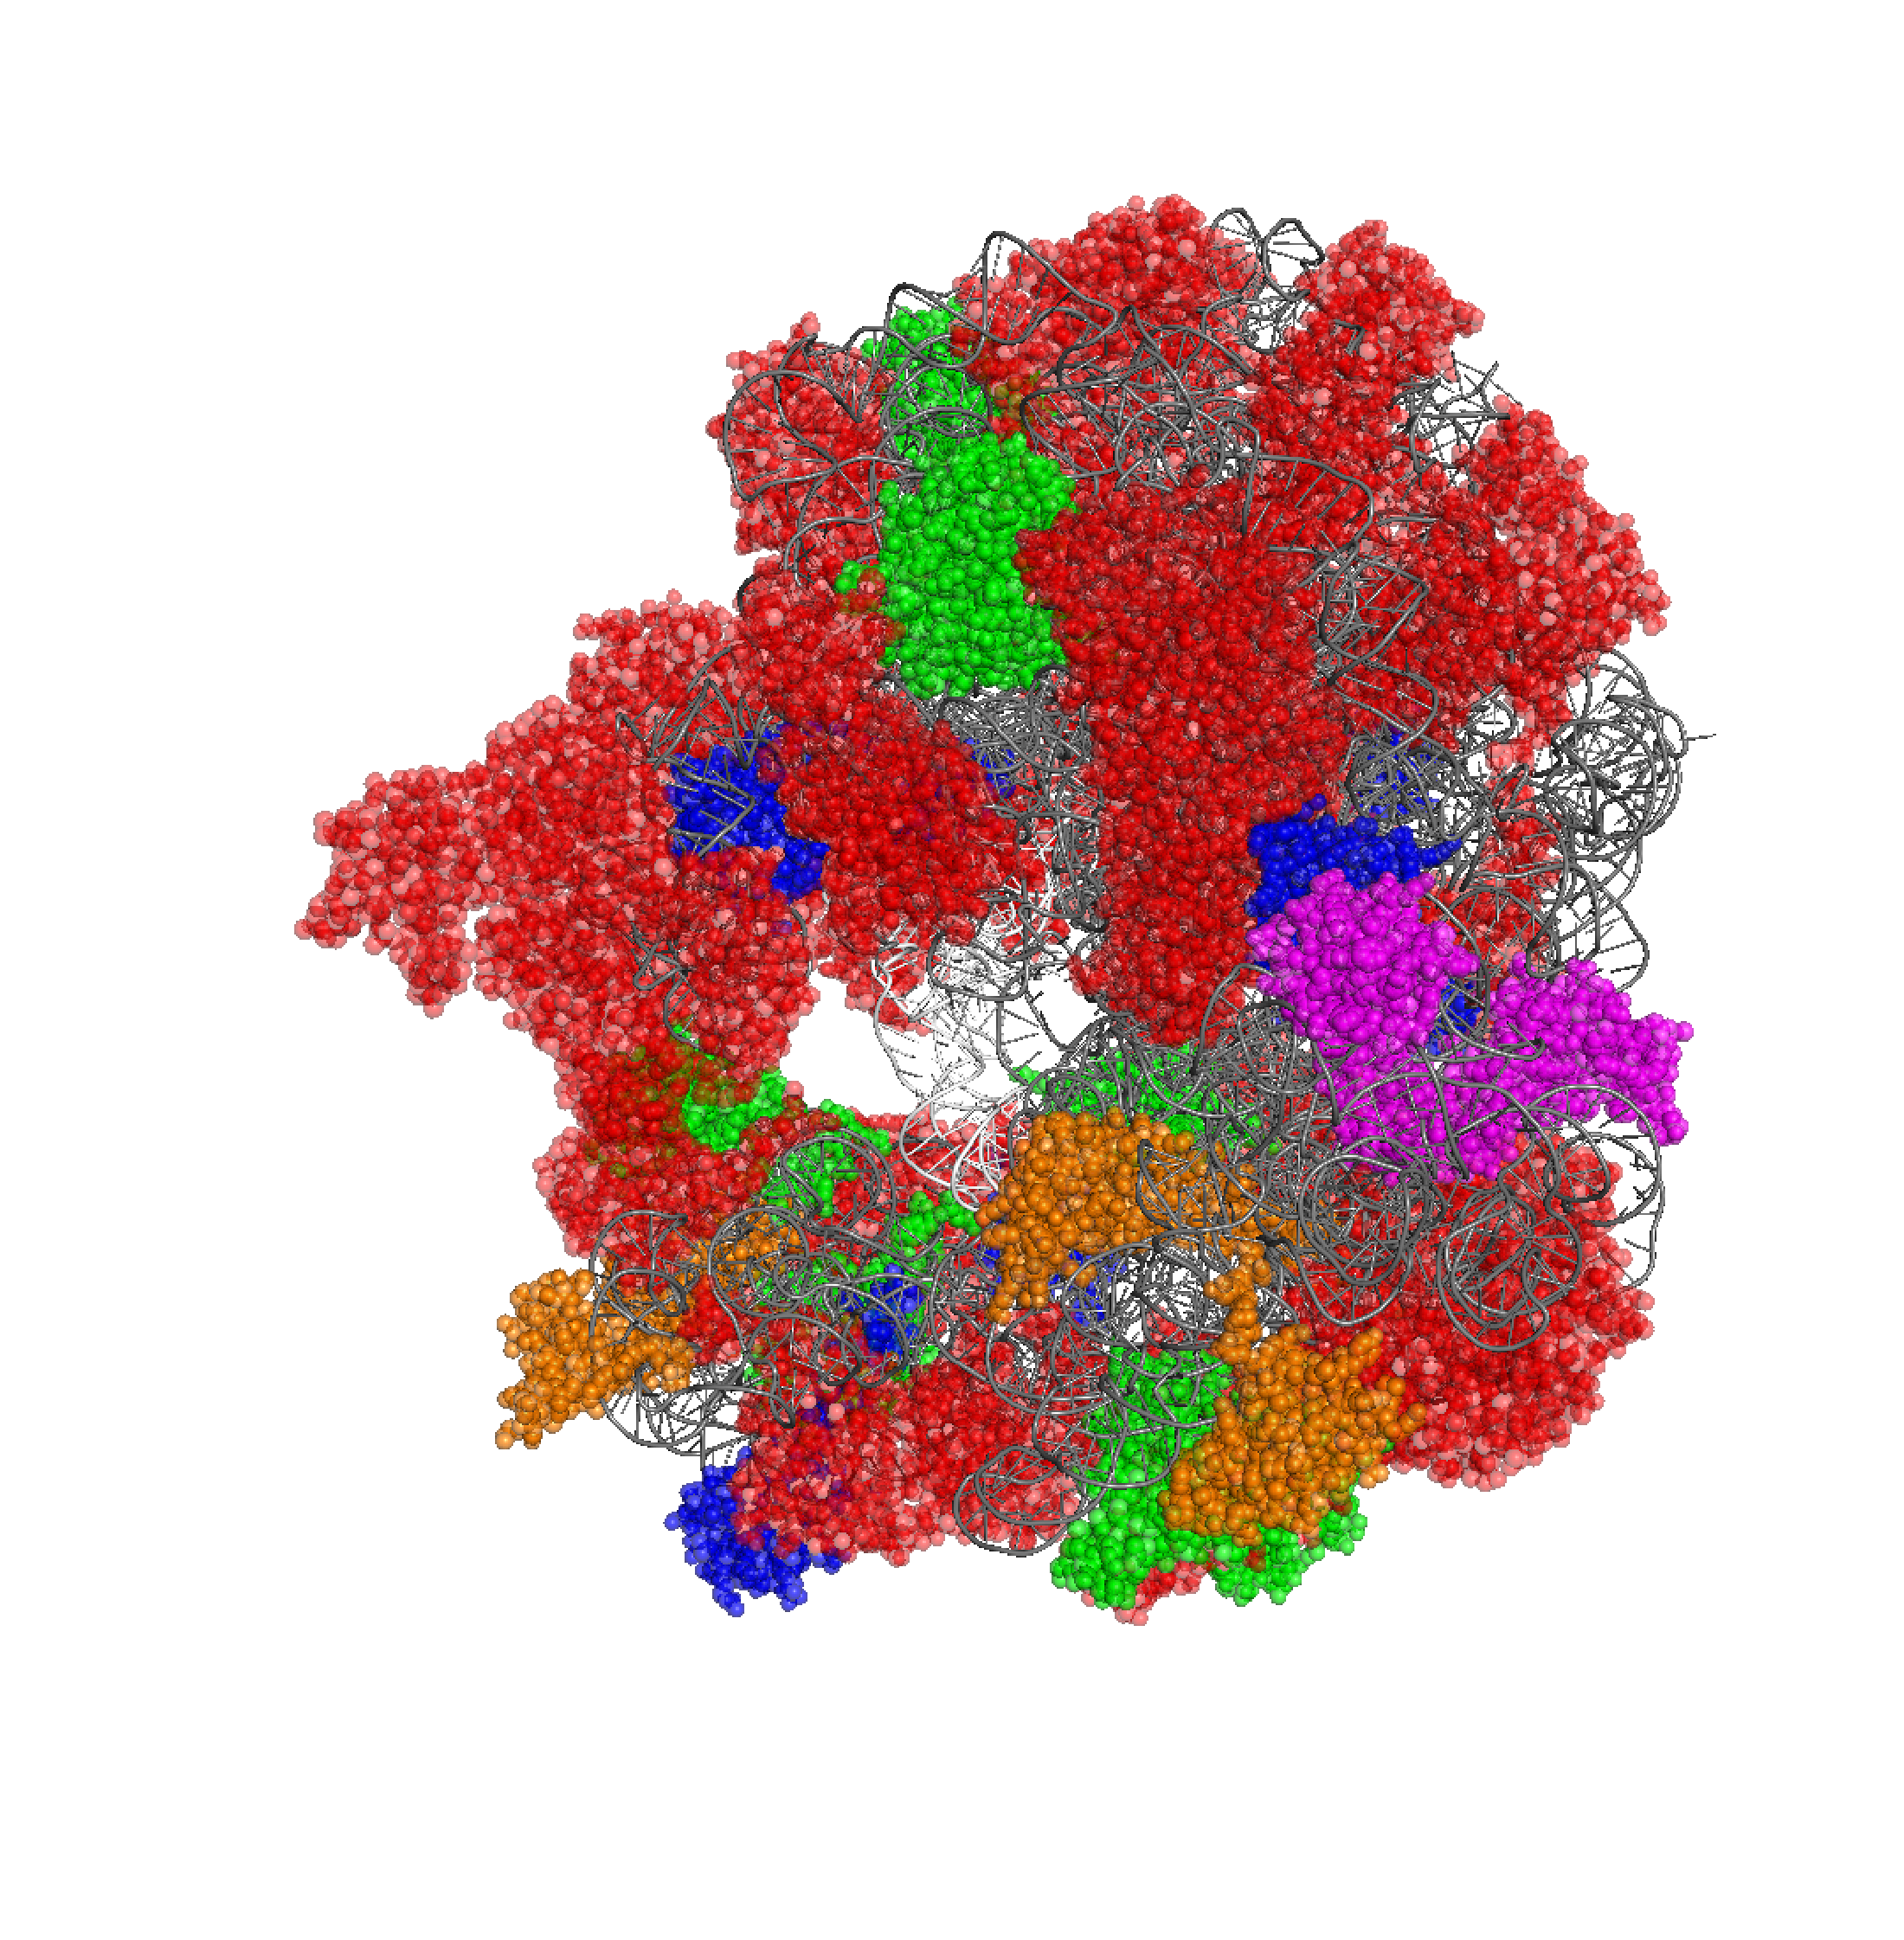

In [44]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
pymol.do('bg white')
fig = pymol.show()

In [3]:
## create image and rotated; save both
pymol.do('ray 3000,3000')
pymol.do('png ribo.png')
pymol.do('rotate y, 180')
pymol.do('ray 3000,3000')
pymol.do('png riboY180.png')

In [45]:
## rotate and save
pymol.do('rotate y, 180')
pymol.do('ray')
pymol.do('png riboY180.png')